# WeatherPy
----

#### Analysis
* Not surprisingly, temperature increases as we approach the   equator. However, temperature peaks at around 20-22 degrees       latitude, not exactly at the equatorial line. This may be due to the   Earth's tilt in the axis known as obliquity.Generally,   the highest global temperatures were within the tropics.
* There is alomost no correlation between cloudiness and latitude. It is almost distributed all around the globe.
* Even the correlation between latitude and wind speed is very weak.
* Humidity is consistently higher in the tropic but still not a strong corealtion with lattitude


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Create variable name to store datas
city_name = []
max_temperature =[]
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
Lat = []
Lang =[]

# initializes record counter
records = 0 

# used to prevent exceeding API limit
max_calls = 50                                                              
sets = 1 
        
print("Beginning Data Retrieval")
print("-----------------------------------------------------------")

#Initiate the for loop
for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "imperial"
    query_url = f"{url}appid={api_key}&q={city}&units={units}"
    response_json = requests.get(query_url).json()
    print(f"Processing Record {records} of Set {sets}|{city}")
    records += 1
    
    if records == max_calls:
        sets += 1
        records = 0
        
    
    try:
        city_name.append(response_json["name"])
        max_temperature.append(response_json["main"]["temp"])
        humidity.append(response_json['main']['humidity'])
        cloudiness.append(response_json['clouds']['all'])
        wind_speed.append(response_json['wind']['speed'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        Lat.append(response_json['coord']['lat'])
        Lang.append(response_json['coord']['lon'])
    except:
        print("City not found. Skipping...")
        continue

print("-----------------------------------------------------------")
print("Data Retrieval Complete ")
print("-----------------------------------------------------------")

Beginning Data Retrieval
-----------------------------------------------------------
Processing Record 0 of Set 1|khairpur nathan shah
Processing Record 1 of Set 1|bluff
Processing Record 2 of Set 1|ushuaia
Processing Record 3 of Set 1|rikitea
Processing Record 4 of Set 1|los llanos de aridane
Processing Record 5 of Set 1|shahreza
Processing Record 6 of Set 1|stornoway
City not found. Skipping...
Processing Record 7 of Set 1|ponta do sol
Processing Record 8 of Set 1|amapa
Processing Record 9 of Set 1|mataura
Processing Record 10 of Set 1|vaitupu
City not found. Skipping...
Processing Record 11 of Set 1|dingle
Processing Record 12 of Set 1|cauquenes
Processing Record 13 of Set 1|luderitz
Processing Record 14 of Set 1|san cristobal
Processing Record 15 of Set 1|taolanaro
City not found. Skipping...
Processing Record 16 of Set 1|sao filipe
Processing Record 17 of Set 1|new norfolk
Processing Record 18 of Set 1|punta arenas
Processing Record 19 of Set 1|nizhneyansk
City not found. Skipping

Processing Record 39 of Set 4|pakwach
City not found. Skipping...
Processing Record 40 of Set 4|peace river
Processing Record 41 of Set 4|torbay
Processing Record 42 of Set 4|athabasca
Processing Record 43 of Set 4|solsvik
City not found. Skipping...
Processing Record 44 of Set 4|emerald
Processing Record 45 of Set 4|narsaq
Processing Record 46 of Set 4|hay river
Processing Record 47 of Set 4|santa maria
Processing Record 48 of Set 4|nome
Processing Record 49 of Set 4|iquitos
Processing Record 0 of Set 5|micheweni
Processing Record 1 of Set 5|geraldton
Processing Record 2 of Set 5|rameswaram
Processing Record 3 of Set 5|novobirilyussy
Processing Record 4 of Set 5|caconda
Processing Record 5 of Set 5|nha trang
Processing Record 6 of Set 5|armacao dos buzios
City not found. Skipping...
Processing Record 7 of Set 5|oum hadjer
Processing Record 8 of Set 5|port hardy
Processing Record 9 of Set 5|san patricio
Processing Record 10 of Set 5|swan river
Processing Record 11 of Set 5|northam
Proc

Processing Record 32 of Set 8|marzuq
Processing Record 33 of Set 8|wanning
Processing Record 34 of Set 8|havre
Processing Record 35 of Set 8|kurmanayevka
Processing Record 36 of Set 8|lazo
Processing Record 37 of Set 8|sechura
Processing Record 38 of Set 8|huntingdon
Processing Record 39 of Set 8|hauzenberg
Processing Record 40 of Set 8|haines junction
Processing Record 41 of Set 8|portree
Processing Record 42 of Set 8|waipawa
Processing Record 43 of Set 8|tabou
Processing Record 44 of Set 8|baglung
Processing Record 45 of Set 8|roma
Processing Record 46 of Set 8|petit goave
Processing Record 47 of Set 8|laguna
Processing Record 48 of Set 8|saldanha
Processing Record 49 of Set 8|shushtar
Processing Record 0 of Set 9|karratha
Processing Record 1 of Set 9|naryan-mar
Processing Record 2 of Set 9|arman
Processing Record 3 of Set 9|maningrida
Processing Record 4 of Set 9|gurskoye
City not found. Skipping...
Processing Record 5 of Set 9|iberia
Processing Record 6 of Set 9|trelew
Processing R

Processing Record 26 of Set 12|gogapur
Processing Record 27 of Set 12|cullinan
Processing Record 28 of Set 12|nioro
Processing Record 29 of Set 12|tumannyy
City not found. Skipping...
Processing Record 30 of Set 12|sale
Processing Record 31 of Set 12|hachinohe
Processing Record 32 of Set 12|gushi
Processing Record 33 of Set 12|saquarema
Processing Record 34 of Set 12|zavetnoye
Processing Record 35 of Set 12|zhelyabovka
Processing Record 36 of Set 12|balaipungut
Processing Record 37 of Set 12|lazaro cardenas
Processing Record 38 of Set 12|cody
Processing Record 39 of Set 12|bo rai
Processing Record 40 of Set 12|newry
Processing Record 41 of Set 12|tessalit
Processing Record 42 of Set 12|mehamn
Processing Record 43 of Set 12|awjilah
Processing Record 44 of Set 12|vao
Processing Record 45 of Set 12|moron
Processing Record 46 of Set 12|college
Processing Record 47 of Set 12|sangmelima
Processing Record 48 of Set 12|shellbrook
Processing Record 49 of Set 12|vila franca do campo
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#create the weather dataframe

weather_df = pd.DataFrame({
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":Lat, 
    "Lng":Lang, 
    "Max Temp": max_temperature,
    "Wind Speed":wind_speed
    })
weather_df.count()

City          565
Cloudiness    565
Country       565
Date          565
Humidity      565
Lat           565
Lng           565
Max Temp      565
Wind Speed    565
dtype: int64

In [5]:
#Save the dataframe in csv format
weather_df.to_csv('WeatherDataFrame.csv')

#display the weather dataframe 
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Khairpur Nathan Shah,0,PK,1562615951,33,27.09,67.73,100.54,10.89
1,Bluff,0,AU,1562615951,91,-23.58,149.07,54.54,2.66
2,Ushuaia,0,AR,1562615653,70,-54.81,-68.31,43.59,8.05
3,Rikitea,100,PF,1562615952,88,-23.12,-134.97,72.68,26.02
4,Los Llanos de Aridane,20,ES,1562615952,64,28.66,-17.92,69.48,14.99


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

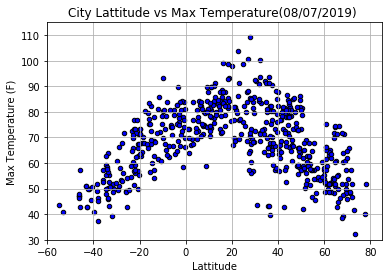

In [13]:
#plot the graph Latitude vs. Temperature

weather_df.plot.scatter(x='Lat',y='Max Temp',c='Blue',edgecolors='black',marker="o")
plt.xlabel("Lattitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Lattitude vs Max Temperature(08/07/2019) ")
plt.grid()
plt.xlim(-60, 85)
plt.ylim(30, 115)
plt.savefig("City_Lattitude_vs_Max_Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

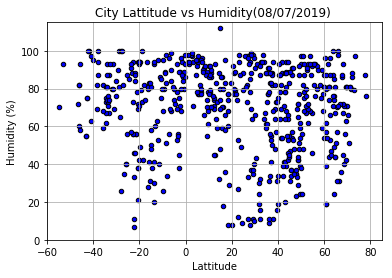

In [18]:
#plot the graph Latitude vs. Humidity

weather_df.plot.scatter(x='Lat',y='Humidity',c='Blue',edgecolors='black',marker="o")
plt.xlabel("Lattitude")
plt.ylabel("Humidity (%)")
plt.title("City Lattitude vs Humidity(08/07/2019) ")
plt.xlim(-60, 85)
plt.ylim(0, 115)
plt.grid()
plt.savefig("City_Lattitude_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

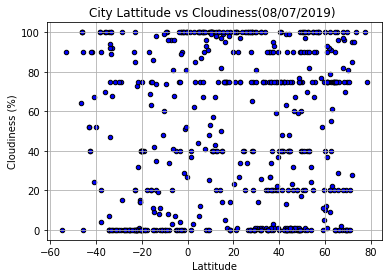

In [20]:
#plot the graph Latitude vs. Cloudiness

weather_df.plot.scatter(x='Lat',y='Cloudiness',c='Blue',edgecolors = 'black')
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Lattitude vs Cloudiness(08/07/2019) ")
plt.grid()
plt.savefig("City_Lattitude_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

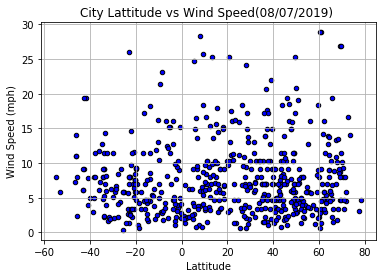

In [19]:
#plot the graph Latitude vs. Wind Speed

weather_df.plot.scatter(x='Lat',y='Wind Speed',c='Blue',edgecolors = 'black')
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Lattitude vs Wind Speed(08/07/2019) ")
plt.grid()
plt.savefig("City_Lattitude_vs_Wind_Speed.png")
plt.show()